/home/ray/.local/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


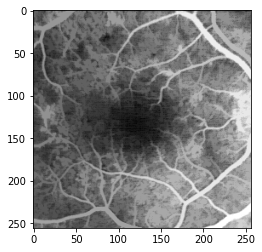

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  4 10:23:50 2018
Modified Oct 2020

@author: Said,Isabelle
"""
#%% SECTION 1 inclusion de packages externes 
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio


# POUR LA MORPHO
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

#%% SECTION 2 fonctions utiles pour le TP

def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    else: #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)

def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase= ' '
    else: #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase=' &'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme  
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.selem.diamond(taille)
    if forme == 'disk':
        return morpho.selem.disk(taille)
    if forme == 'square':
        return morpho.selem.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=morpho.selem.draw.line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')

            

def couleurs_alea(im):
    """ 
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out
    
#%% SECTION 3 exemples de commandes pour effectuer ce qui est demande pendant le TP

# Images binaire
im=skio.imread('Images/cellbin.bmp')
#im=skio.imread('cafe.bmp')

# Images à niveaux de gris
#im=skio.imread('retina2.gif')
#im=skio.imread('bat200.bmp')
#im=skio.imread('bulles.bmp')
#im=skio.imread('cailloux.png')
#im=skio.imread('cailloux2.png')
#im=skio.imread('laiton.bmp')

plt.imshow(im,cmap="gray")
# viewimage(im) - Utilisable à la place de plt.imshow si Gimp est installé.

se=strel('disk',4)

# dilatation
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")

# erosion
ero=morpho.erosion(im,se)
plt.imshow(ero,cmap="gray")

#ouverture
open=morpho.opening(im,se)
plt.imshow(open,cmap="gray")

#fermeture
close=morpho.closing(im,se)
plt.imshow(close,cmap="gray")
                      
#%% Chapeau haut-de-forme
im=skio.imread('Images/retina2.gif')
t=10
se=strel('line',t,-45)
ch=im-morpho.opening(im,se)
plt.imshow(ch,cmap="gray")

#%%  Filtre alterne sequentiel
im=skio.imread('Images/retina2.gif')
imt=im.copy()
N=3
for k in range(N):
    se=strel('disk',k)
    imt=morpho.closing(morpho.opening(imt,se),se)
plt.imshow(imt,cmap="gray")



#%% ligne de partage des eaux
im=skio.imread('Images/bat200.bmp')
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualiation du resultat
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0: 
            segm[i,j]=255
        else:
            segm[i,j]=0
#superposition des contours de la segmentation a l'image initiale
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray") 


#%% reconstruction
im=skio.imread('Images/retina2.gif')
se4=strel('disk',4)
open4=morpho.opening(im,se4)
reco=morpho.reconstruction(open4,im)
plt.imshow(reco,cmap="gray")
#%% FIN  exemples TP MORPHO


# 1. Morphologie Mathématique sur des Images à niveaux de gris

- Q1.1 Tester les dilatation, érosion, ouverture et fermeture avec différentes formes et tailles d’éléments structurants (fonctions morpho.dilation, erosion, opening ou closing 1
).
- Quelle est l’influence de la taille et de la forme de l’élément structurant ?

### Dilatation
#### Cercle

Image Originelle.


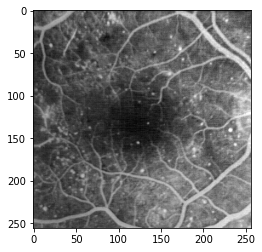

In [2]:
# Images à niveaux de gris
#im=skio.imread('retina2.gif')
#im=skio.imread('bat200.bmp')
#im=skio.imread('bulles.bmp')
#im=skio.imread('cailloux.png')
#im=skio.imread('cailloux2.png')
#im=skio.imread('laiton.bmp')
print("Image Originelle.")
im=skio.imread('Images/retina2.gif')
plt.imshow(im,cmap="gray")


Dilation : Disk size 4


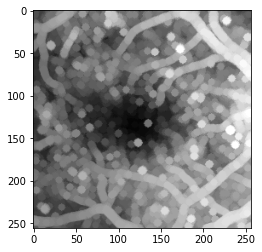

In [3]:
se=strel('disk',4)

# dilatation
print("Dilation : Disk size 4")
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")

Dilation : Disk size 15


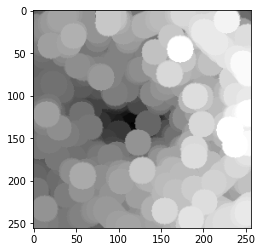

In [4]:
se=strel('disk',15)

# dilatation
print("Dilation : Disk size 15")
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")

#### Diamond

Image Originelle.


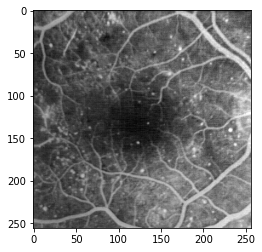

In [5]:
print("Image Originelle.")
im=skio.imread('Images/retina2.gif')
plt.imshow(im,cmap="gray")

Dilation : Diamond size 4


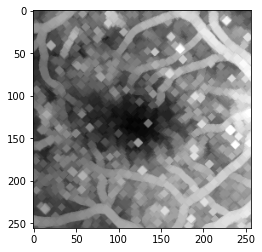

In [6]:
se=strel('diamond',4)

# dilatation
print("Dilation : Diamond size 4")
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")

Dilation : Diamond size 4


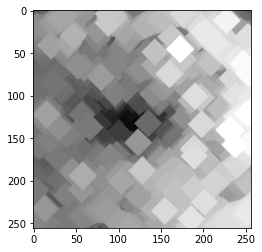

In [7]:
se=strel('diamond',15)

# dilatation
print("Dilation : Diamond size 4")
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")

### Comparatif types d'opérations ( avec Diamant taille 4 )

#### Dilatation

Dilation : Diamond size 4


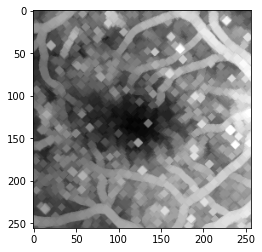

In [8]:
im=skio.imread('Images/retina2.gif')
se=strel('diamond',4)
# dilatation
print("Dilation : Diamond size 4")
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")

#### Erosion

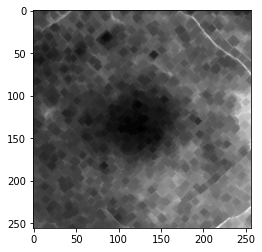

In [9]:
# erosion
ero=morpho.erosion(im,se)
plt.imshow(ero,cmap="gray")


#### Ouverture

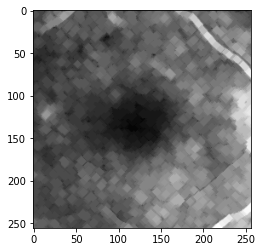

In [10]:
#ouverture
open=morpho.opening(im,se)
plt.imshow(open,cmap="gray")


#### Fermeture

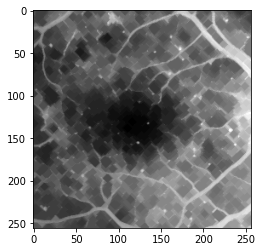

In [11]:
#fermeture
close=morpho.closing(im,se)
plt.imshow(close,cmap="gray")

 - Q1.3 - A quoi est égale la succession d’une dilatation par un carré de taille 3×3 et d’une dilatation par un carré de taille 5 × 5 ? Même question pour l’ouverture. Quelles sont les propriétés de ces deux opérations qui expliquent ces résultats ?

#### DIlatation Carré 3x3 -> Carré 5x5

Image Originelle.


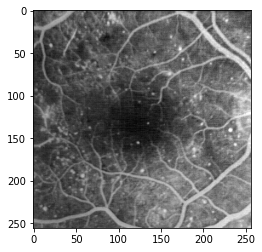

In [12]:
print("Image Originelle.")
im=skio.imread('Images/retina2.gif')
plt.imshow(im,cmap="gray")

Dilation : Disk size 3


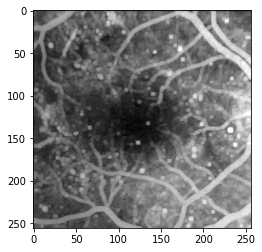

In [13]:
se=strel('square',3)

# dilatation
print("Dilation : Disk size 3")
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")

Dilation : Disk size 5


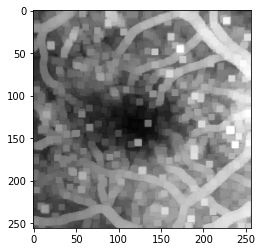

In [14]:
se=strel('square',5)

# dilatation
print("Dilation : Disk size 5")
dil=morpho.dilation(dil,se)
plt.imshow(dil,cmap="gray")

Dilation : Disk size 5


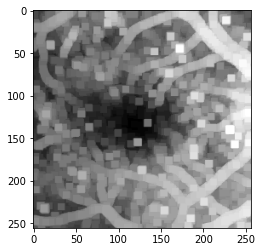

In [15]:
se=strel('square',8)

# dilatation
print("Dilation : Disk size 5")
rldil=morpho.dilation(im,se)
plt.imshow(rldil,cmap="gray")

#### Ouverture Carré 3x3 -> Carré 5x5

Dilation : Disk size 3


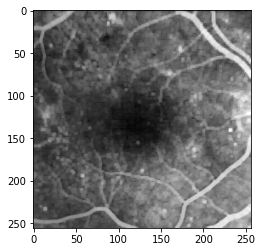

In [16]:
se=strel('square',3)

# dilatation
print("Dilation : Disk size 3")
ouv=morpho.opening(im,se)
plt.imshow(ouv,cmap="gray")

Dilation : Disk size 3


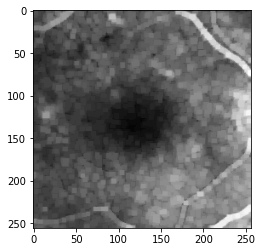

In [17]:
se=strel('square',5)

# dilatation
print("Dilation : Disk size 3")
ouv=morpho.opening(ouv,se)
plt.imshow(ouv,cmap="gray")

Dilation : Disk size 3


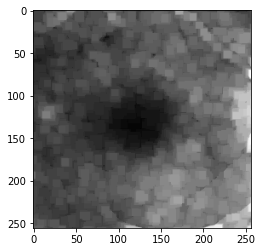

In [18]:
se=strel('square',8)

# dilatation
print("Dilation : Disk size 3")
rl=morpho.opening(im,se)
plt.imshow(rl,cmap="gray")

- Q1.4 Effectuer une transformation du chapeau haut-de-forme sur une image à niveaux de gris (image originale moins ouverture), par exemple sur l’image retina2.gif. Commenter le résultat pour différentes tailles et différentes formes d’éléments structurants. Quelle serait
l’opération duale (illustrer sur l’image laiton.bmp par exemple) ?

#### Chapeau haut de forme

Image Originelle.


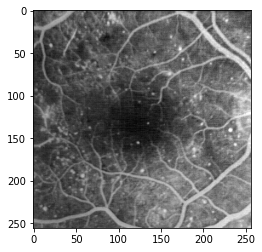

In [19]:
print("Image Originelle.")
im=skio.imread('Images/retina2.gif')
plt.imshow(im,cmap="gray")

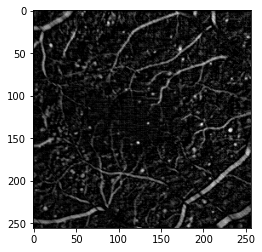

In [20]:
t=10
se=strel('line',t,-45)
ch=im-morpho.opening(im,se)
plt.imshow(ch,cmap="gray")

### Segments

- 5. Définir des segments dans plusieurs directions comme éléments structurants, et calculer le max des ouvertures obtenues pour chacun. Conclusion ?

Image Originelle.


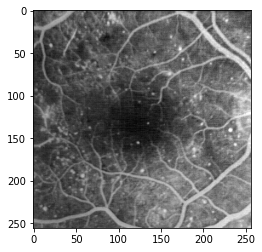

In [21]:
print("Image Originelle.")
im=skio.imread('Images/retina2.gif')
plt.imshow(im,cmap="gray")

# 2. Filtres Alternés Séquentiels

Image Originelle.


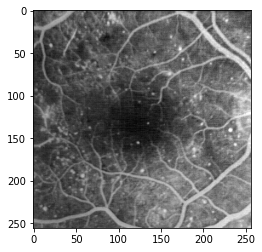

In [73]:
print("Image Originelle.")
im=skio.imread('Images/retina2.gif')
plt.imshow(im,cmap="gray")

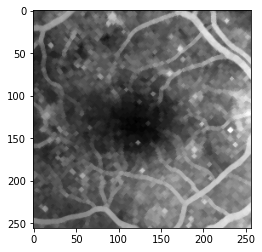

In [74]:
se1=strel("disk",1)
se2=strel("disk",2)
se3=strel("disk",3)
se4=strel("disk",4)
se5=strel("disk",5)
# Ouverture
# Dilatation 
# Reconstruction

# Fermeture
# Erosion
# Reconstruction
opened = morpho.opening(im, se1)
dilat = morpho.dilation(opened, se1)
recd = morpho.reconstruction(opened, dilat)

closed = morpho.closing(recd, se1)
ero = morpho.erosion(closed, se1)
fas1=morpho.reconstruction( ero, closed)
plt.imshow(fas1,cmap="gray")

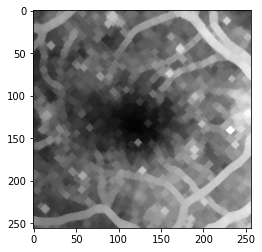

In [75]:
opened = morpho.opening(fas1, se2)
dilat = morpho.dilation(opened, se2)
recd = morpho.reconstruction(opened, dilat)

closed = morpho.closing(recd, se2)
ero = morpho.erosion(closed, se2)
fas2=morpho.reconstruction( ero, closed)
plt.imshow(fas2,cmap="gray")

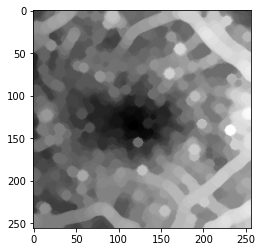

In [76]:
opened = morpho.opening(fas2, se3)
dilat = morpho.dilation(opened, se3)
recd = morpho.reconstruction(opened, dilat)

closed = morpho.closing(recd, se3)
ero = morpho.erosion(closed, se3)
fas3 = morpho.reconstruction( ero, closed)
plt.imshow(fas3,cmap="gray")

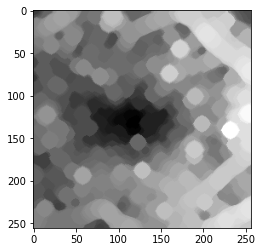

In [77]:
opened = morpho.opening(fas3, se4)
dilat = morpho.dilation(opened, se4)
recd = morpho.reconstruction(opened, dilat)

closed = morpho.closing(recd, se4)
ero = morpho.erosion(closed, se4)
fas4 = morpho.reconstruction( ero, closed)
plt.imshow(fas4,cmap="gray")

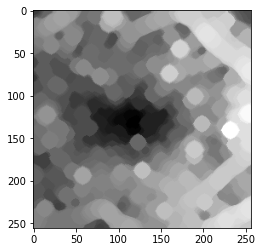

In [78]:
opened = morpho.opening(fas3, se4)
dilat = morpho.dilation(opened, se4)
recd = morpho.reconstruction(opened, dilat)

closed = morpho.closing(recd, se4)
ero = morpho.erosion(closed, se4)
fas4 = morpho.reconstruction( ero, closed)
plt.imshow(fas4,cmap="gray")

# 3. Reconstruction

La reconstruction permet de rendre les opérations robustes. La reconstruction par dilatation
est obtenue par la séquence suivante (m est le marqueur, I l’image à reconstruire, ou masque, et
B1 est un élément structurant élémentaire, de taille 1) :\
m0 = m ∧ I\
m1 = D(m0, B1) ∧ I\
...\
mi = D(mi−1, B1) ∧ I\
...\
cette séquence étant itérée jusqu’à convergence (lorsque mn = mn−1)

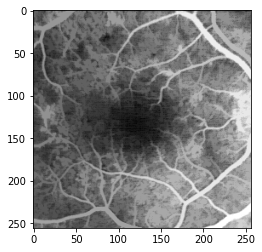

In [28]:
im=skio.imread("Images/retina2.gif")
se4 = strel("disk",4)
open4 = morpho.opening(im,se4)
reco=morpho.reconstruction(open4,im)
plt.imshow(reco,cmap="gray")

- Commenter les résultats.
- Ajouter une reconstruction à chaque étape du filtre alterné séquentiel (reconstruction par dilatation après chaque ouverture et reconstruction par érosion après chaque fermeture). Commenter.

# 4. Segmentation

- Q4.1 Calculer le gradient morphologique (dilatation - érosion avec un élément structurant élémentaire, de taille 1), par exemple sur l’image bat200.bmp. Commenter.

- Q4.2 Appliquer l’algorithme de ligne de partage des eaux sur l’image de gradient (voir la section
correspondante dans le fichier d’exemples)

- Q4.3 Commenter. Pour la visualisation, on peut sélectionner les lignes (points de valeur 0) et
les superposer à l’image originale.

- Q4.4 Essayer de filtrer l’image originale (par un filtre alterné séquentiel bien choisi par exemple)
et/ou l’image de gradient (par une fermeture) avant d’appliquer la ligne de partage des
eaux pour améliorer le résultat.

- Q4.5 Eliminer les minima de dynamique inférieure à un certain seuil avant d’utiliser la ligne de
partage des eaux.

- Q4.6 Définir des marqueurs (à la main, ou par un pré-traitement), avec par exemple un marqueur dans l’objet à segmenter et un marqueur sur tout le bord de l’image (ou plusieursmarqueurs à l’extérieur de l’objet à segmenter). Soit m le marqueur, tel que m vaut 0 dans les zones marquées et 255 ailleurs. \
On calcule I0 = I ∧ m, où I est l’image sur laquelle on veut appliquer la ligne de partage des eaux (image de gradient, ou image inversée dans le cas de laiton.bmp par exemple). Puis on reconstruit I0 par érosion à partir de m. \
L’image reconstruite n’a que des minima là où ils sont indiqués par m, et la ligne de partage des
eaux peut alors être appliquée à cette image reconstruite. Commenter les résultats.

- Q4.7 Comment pourrait on utiliser la ligne de partage des eaux (associée à d’autres étapes)
pour segmenter les lignes noires dans l’image bulles.bmp ou laiton.bmp ?

Original


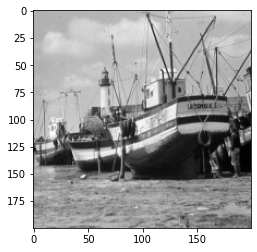

In [29]:
# Gradient morphologique
im=skio.imread("Images/bat200.bmp")
se4 = strel("disk",1)
print("Original")
plt.imshow(im,cmap="gray")

Dilatation


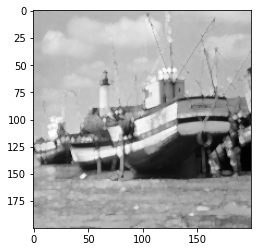

In [30]:
se = strel("disk",1)
dil=morpho.dilation(im,se)
print("Dilatation")
plt.imshow(dil,cmap="gray")

Erosion


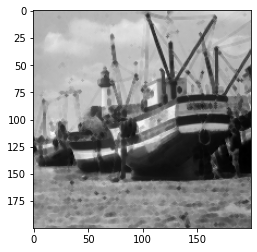

In [31]:
# erosion
print("Erosion")
ero=morpho.erosion(im,se)
plt.imshow(ero,cmap="gray")

Erosion


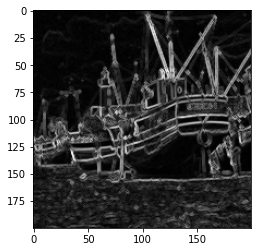

In [32]:
# grad morphologique
print("Erosion")
grad = dil - ero
plt.imshow(grad,cmap="gray")

(200, 200, 3)


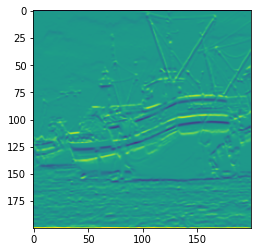

In [33]:
# Gradient de l'image par Sobel

im = skio.imread("Images/bat200.bmp")

from scipy.signal import convolve2d
def compute_grad(I):
    Sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/4
    Sy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])/4

    Ix = convolve2d(I, Sx, 'same')
    Iy = convolve2d(I, Sy,'same')
    Ig = np.sqrt(Ix**2+Iy**2)

    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(im)


import numpy.ma as ma
import cv2
# Commenter. Pour la visualisation, 
# on peut sélectionner les lignes (points de valeur 0) 
# et les superposer à l’image originale
im=skio.imread('Images/bat200.bmp')
backtorgb = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
print(backtorgb.shape)

r = np.argwhere(np.logical_or((Ix!=0), (Iy!=0)))

for i in r:
    backtorgb[i[0], i[1]] = [255, 0, 0]
    #= [1, 0, 0]


plt.imshow(Ix)
plt.imshow(Iy)
#plt.show()




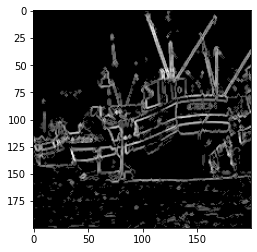

In [34]:
# ligne de partage des eaux sur GRADIENT
im=skio.imread('Images/bat200.bmp')
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")

(200, 200, 3)


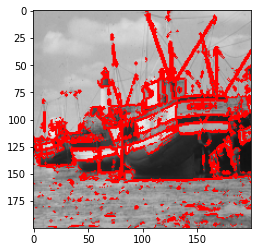

In [35]:
import numpy.ma as ma
import cv2
# Commenter. Pour la visualisation, 
# on peut sélectionner les lignes (points de valeur 0) 
# et les superposer à l’image originale
im=skio.imread('Images/bat200.bmp')
backtorgb = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
print(backtorgb.shape)

r = np.argwhere(grad!=0)

for i in r:
    backtorgb[i[0], i[1]] = [255, 0, 0]
    #= [1, 0, 0]


plt.imshow(backtorgb)









#plt.imshow(applied_mask, cmap='gray')

In [36]:
matrix = np.random.randint(9, size=(3,3))
print(matrix)
np.where(matrix == 2)

[[1 3 3]
 [0 7 7]
 [6 3 8]]


(array([], dtype=int64), array([], dtype=int64))

Fermeture gradient


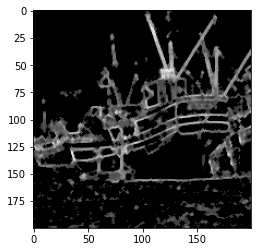

In [37]:
# Essayer de filtrer l’image originale 
# (par un filtre alterné séquentiel bien choisi par exemple)et/ou 
# l’image de gradient (par une fermeture) avant d’appliquer 
# la ligne de partage deseaux pour améliorer le résultat.

# Gradient 
se=morpho.selem.disk(1)
close=morpho.closing(grad,se)
plt.imshow(close,cmap="gray")


print("Fermeture gradient")


/home/ray/.local/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


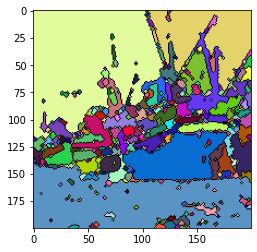

In [38]:
# ligne partage des eaux
se=morpho.selem.disk(1)

grade=morpho.dilation(close, se)-morpho.erosion(close, se)
grade=np.int32(grade>40)*grade
plt.imshow(grade, cmap="gray")

local_mini = skf.peak_local_max(255-grade, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")

labels = morpho.watershed(grade, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))

(200, 200, 3)


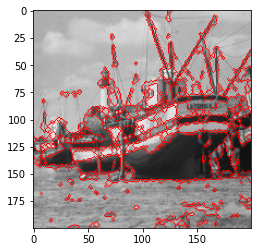

In [39]:
backtorgb = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
print(backtorgb.shape)

r = np.argwhere(labels==0)

for i in r:
    backtorgb[i[0], i[1]] = [255, 0, 0]
    #= [1, 0, 0]
plt.imshow(backtorgb)

/home/ray/.local/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


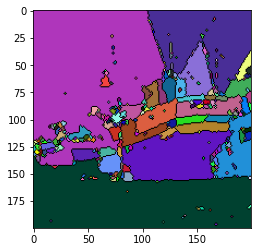

In [88]:
# FILTRAGE puis LIGNE PARTAGE DES EAUX
im=skio.imread('Images/bat200.bmp')

se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")



imt=grad.copy()
N=7
for k in range(N):
    se=strel('disk',k)
    imt = morpho.erosion(imt, se)
    imt =morpho.reconstruction( imt, m)
#plt.imshow(imt,cmap="gray")

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))

In [41]:
# MARQUEURS
"""
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im=skio.imread('Images/cailloux.png')
ax = plt.gca()
fig = plt.gcf()
implot = ax.imshow(im)

count = 0
coordinates = []
def onclick(event):
    global count, coordinates, coordinates, im
    if event.xdata != None and event.ydata != None:
        print(event.xdata, event.ydata)
        count+=1
        coordinates.append((int(event.xdata), int(event.ydata)))

        if count==10:
            marqueurs = np.ones((im.shape))*255
            #print("Arrived0")
            marqueurs[tuple(np.transpose(coordinates))] = 0
            #print("Arrived1")
            #print("Marqueurs shape : "+str(marqueurs.shape))
            #print("Arrived2")
            #print("Image shape : "+str(im.shape))
            intersect = morpho.erosion(im, marqueurs)
            #print(reconstruite)
            plt.imshow(intersect, cmap="gray")
            plt.show()

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()
"""

'\n%matplotlib tk\nimport matplotlib.pyplot as plt\nimport matplotlib.image as mpimg\nim=skio.imread(\'Images/cailloux.png\')\nax = plt.gca()\nfig = plt.gcf()\nimplot = ax.imshow(im)\n\ncount = 0\ncoordinates = []\ndef onclick(event):\n    global count, coordinates, coordinates, im\n    if event.xdata != None and event.ydata != None:\n        print(event.xdata, event.ydata)\n        count+=1\n        coordinates.append((int(event.xdata), int(event.ydata)))\n\n        if count==10:\n            marqueurs = np.ones((im.shape))*255\n            #print("Arrived0")\n            marqueurs[tuple(np.transpose(coordinates))] = 0\n            #print("Arrived1")\n            #print("Marqueurs shape : "+str(marqueurs.shape))\n            #print("Arrived2")\n            #print("Image shape : "+str(im.shape))\n            intersect = morpho.erosion(im, marqueurs)\n            #print(reconstruite)\n            plt.imshow(intersect, cmap="gray")\n            plt.show()\n\ncid = fig.canvas.mpl_connect(

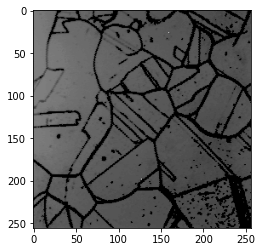

In [42]:
# BULLES
im=skio.imread('Images/laiton.bmp')
thresh = 65
indices = im < thresh
im[indices] = 0
plt.imshow(im, cmap="gray")
#plt.show()

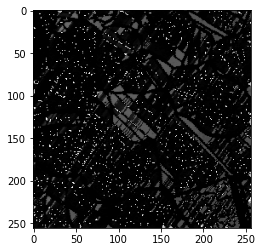

In [43]:
t=10
se=strel('line',t,-130)
im=im-morpho.opening(im,se)
plt.imshow(im,cmap="gray")

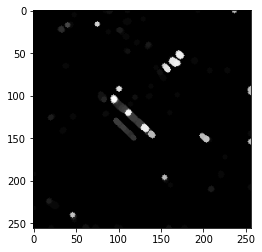

In [44]:
N=4
for k in range(N):
    se=strel('disk',k)
    im=morpho.opening(im,se)

plt.imshow(im,cmap="gray")



In [45]:
for k in range(N):
    se=strel('disk',k)
    im=morpho.erosion(im,se)



/home/ray/.local/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


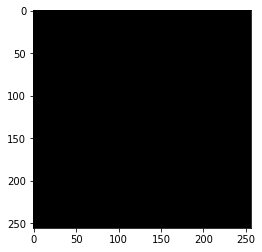

In [46]:
e=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))

(256, 256, 3)


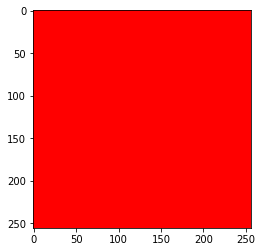

In [47]:
im=skio.imread('Images/laiton.bmp')
backtorgb = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
print(backtorgb.shape)

r = np.argwhere(labels==0)

for i in r:
    backtorgb[i[0], i[1]] = [255, 0, 0]
    #= [1, 0, 0]
plt.imshow(backtorgb)

# RECONSTRUCTION

Opened


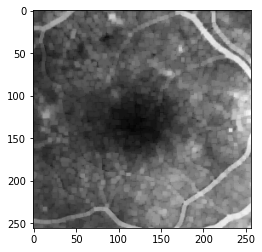

In [48]:
im=skio.imread("Images/retina2.gif")
se4 = strel("square",4)
open4 = morpho.opening(im,se4)
print("Opened")
plt.imshow(open4,cmap="gray")


Reconstructed


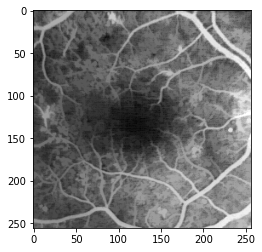

In [49]:
reco=morpho.reconstruction(open4,im)
print("Reconstructed")
plt.imshow(reco,cmap="gray")

#### reconstruction filtre séquentiel

In [50]:
im=skio.imread('Images/retina2.gif')
imt=im.copy()
N=5
for k in range(N):
    print("Etape 1")
    se = strel('disk',k)
    dil = morpho.dilatation(imt, se)
    opened = morpho.opening(imt,se)
    reco_dil = morpho.reconstruction(opened, dil)
    
    
    imt = morpho.closing(opened, se)
    print("Filtré")
    plt.imshow(imt,cmap="gray")
    print("Reconstruit")
    reco=morpho.reconstruction(open4,im)

Etape 1


AttributeError: module 'skimage.morphology' has no attribute 'dilatation'